In [247]:
import pandas as pd
import numpy as np
import tensorflow as tf

path="C:\/users/student/Downloads/데이터들/"

In [49]:
tf.set_random_seed(777)
np.random.seed(777)

In [50]:
# ydata=xdata*w+b
w=tf.Variable(tf.random_normal([1]), name='weight')
b=tf.Variable(tf.random_normal([1]), name='bias')

In [51]:
x=tf.placeholder(tf.float32, shape=[None]) 
# shape=[None] 개수가 정해지지 않음 => 1차원으로 구성된 데이터를 받겠다, 데이터 형태가 고정되어있지 않음
y=tf.placeholder(tf.float32, shape=[None]) 

In [64]:
hf=x*w*b
cost=tf.reduce_mean(tf.square(hf-y))

In [65]:
opt=tf.train.GradientDescentOptimizer(learning_rate=0.01)
train=opt.minimize(cost)

In [66]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [67]:
for step in range(2001):
    _,cv,bv,wv=sess.run([train,cost,b,w], feed_dict={x:[1,2,3],y:[2,3,4]}) # _ : train은 무시
    if step % 100==0:
        print(step, cv, bv, wv)    

0 7.0121455 [-1.0987419] [-0.32194436]
100 0.14285713 [-1.4344883] [-0.9958751]
200 0.14285713 [-1.4344883] [-0.9958751]
300 0.14285713 [-1.4344883] [-0.9958751]
400 0.14285713 [-1.4344883] [-0.9958751]
500 0.14285713 [-1.4344883] [-0.9958751]
600 0.14285713 [-1.4344883] [-0.9958751]
700 0.14285713 [-1.4344883] [-0.9958751]
800 0.14285713 [-1.4344883] [-0.9958751]
900 0.14285713 [-1.4344883] [-0.9958751]
1000 0.14285713 [-1.4344883] [-0.9958751]
1100 0.14285713 [-1.4344883] [-0.9958751]
1200 0.14285713 [-1.4344883] [-0.9958751]
1300 0.14285713 [-1.4344883] [-0.9958751]
1400 0.14285713 [-1.4344883] [-0.9958751]
1500 0.14285713 [-1.4344883] [-0.9958751]
1600 0.14285713 [-1.4344883] [-0.9958751]
1700 0.14285713 [-1.4344883] [-0.9958751]
1800 0.14285713 [-1.4344883] [-0.9958751]
1900 0.14285713 [-1.4344883] [-0.9958751]
2000 0.14285713 [-1.4344883] [-0.9958751]


In [71]:
print(sess.run(hf,feed_dict={x:[10]}))
print(sess.run(hf,feed_dict={x:[10,10.5]}))
print(sess.run(hf,feed_dict={x:[10,10.5,43,100]}))

[14.285713]
[14.285713 14.999998]
[ 14.285713  14.999998  61.428566 142.85712 ]


In [72]:
# 변수값 초기화

In [93]:
w=tf.Variable([100.], tf.float32)
b=tf.Variable([-10.], tf.float32)
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)
# hf=100*w-10

In [94]:
hf=x*w+b
cost=tf.reduce_sum(tf.square(hf-y))

In [95]:
opt=tf.train.GradientDescentOptimizer(0.01)
train=opt.minimize(cost)

In [96]:
xtrain=[1,2,3,4,5]
ytrain=[0,-1,-2,-3,-4]

In [97]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [98]:
for i in range(1000):
    sess.run(train, {x:xtrain,y:ytrain})

In [99]:
wv,bv,costv=sess.run([w,b,cost], {x:xtrain,y:ytrain})
print("weight:%s bias:%s cost:%s" %(wv, bv, costv))

weight:[-0.9999995] bias:[0.99999833] cost:2.5579538e-12


In [100]:
### 연습문제 ###

In [205]:
x=[1,2,3]
y=[1,2,3]

In [206]:
# b 는 무시
w=tf.placeholder(tf.float32)
hf=x*w
cost=tf.reduce_mean(tf.square(hf-y))

In [207]:
# 선형회귀모델 작성
# 시각화 -> weight값을 -3~5 0.1씩 증가시키면서 cost값의 변화를 출력

In [208]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [209]:
import matplotlib.pyplot as plt

In [211]:
w_val=[]
cost_val=[]
for i in range(-30, 50):
    feed_w = i * 0.1
    curr_cost, curr_w = sess.run([cost, w], feed_dict={w:feed_w})
    w_val.append(curr_w)
    cost_val.append(curr_cost)

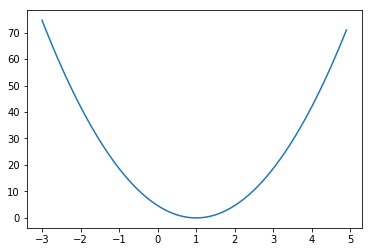

In [213]:
plt.plot(w_val, cost_val)
plt.show()

In [172]:
### 경사하강법에서 update 구문 작성
xdata=[1,2,3]
ydata=[1,2,3]

In [173]:
w=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [174]:
hf=x*w

In [175]:
lr=0.1
cost=tf.reduce_mean(tf.square(hf-y))
gradient=tf.reduce_mean((w*x-y)*w)
descent=w-lr*gradient
update=w.assign(descent)

In [177]:
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={x:xdata, y:ydata})
    print(step, sess.run(cost, feed_dict={x:xdata,y:ydata}), sess.run(w))

0 7.5538545 [-0.27227482]
1 8.398945 [-0.3415565]
2 9.585622 [-0.43319997]
3 11.318574 [-0.5573724]
4 13.982689 [-0.7309797]
5 18.36997 [-0.98404187]
6 26.312231 [-1.3745179]
7 42.767353 [-2.0272815]
8 84.478676 [-3.2547119]
9 230.256 [-6.0242844]
10 1119.3651 [-14.487542]
11 17003.799 [-59.362827]
12 2817579.0 [-776.0244]
13 68748845000.0 [-121374.016]
14 4.05147e+19 [-2.946476e+09]
15 1.4069492e+37 [-1.7363442e+18]
16 inf [-6.0297825e+35]
17 inf [-inf]
18 inf [-inf]
19 inf [-inf]
20 inf [-inf]


In [178]:
### multi variable linear regression

In [179]:
x1data=[73,93,90,95,72]
x2data=[80,88,92,98,66]
x3data=[75,92,90,100,70]
ydata=[152,185,180,195,140]

In [180]:
x1=tf.placeholder(tf.float32)
x2=tf.placeholder(tf.float32)
x3=tf.placeholder(tf.float32)
y=tf.placeholder(tf.float32)

In [181]:
w1=tf.Variable(tf.random_normal([1]))
w2=tf.Variable(tf.random_normal([1]))
w3=tf.Variable(tf.random_normal([1]))
b=tf.Variable(tf.random_normal([1]))
hf=x1*w1+x2*w2+x3*w3+b

In [182]:
cost=tf.reduce_mean(tf.square(hf-y))

In [183]:
opt=tf.train.GradientDescentOptimizer(1e-5) # 1/10^5
train=opt.minimize(cost)

In [187]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [191]:
for step in range(2001):
    cv, hfv, _=sess.run([cost, hf, train], feed_dict={x1:x1data,x2:x2data,x3:x3data,y:ydata})
    if step%10:
        print(step, "cost:",cv,"\nprediction:",hfv,"\n")

1 cost: 3.6666634 
prediction: [153.15298 182.92465 183.0123  193.10602 140.18912] 

2 cost: 3.666179 
prediction: [153.15265 182.92485 183.01215 193.10602 140.18936] 

3 cost: 3.6656938 
prediction: [153.15233 182.9251  183.01204 193.10605 140.18959] 

4 cost: 3.6652465 
prediction: [153.15201 182.9253  183.0119  193.10603 140.18983] 

5 cost: 3.6647925 
prediction: [153.15169 182.92549 183.01178 193.10605 140.19006] 

6 cost: 3.6643188 
prediction: [153.15137 182.92572 183.01164 193.10603 140.19029] 

7 cost: 3.6638234 
prediction: [153.15105 182.92593 183.0115  193.10606 140.19052] 

8 cost: 3.6633759 
prediction: [153.15073 182.92613 183.01137 193.10605 140.19077] 

9 cost: 3.6629155 
prediction: [153.1504  182.92636 183.01126 193.10606 140.191  ] 

11 cost: 3.6619701 
prediction: [153.14975 182.92676 183.01097 193.10606 140.19145] 

12 cost: 3.661512 
prediction: [153.14943 182.92699 183.01086 193.10608 140.1917 ] 

13 cost: 3.6610694 
prediction: [153.14911 182.9272  183.01074 19

116 cost: 3.614017 
prediction: [153.11646 182.9488  182.99757 193.10678 140.21562] 

117 cost: 3.6135688 
prediction: [153.11615 182.94902 182.99745 193.1068  140.21587] 

118 cost: 3.6131253 
prediction: [153.11584 182.94925 182.99734 193.10681 140.2161 ] 

119 cost: 3.6126823 
prediction: [153.11551 182.94943 182.9972  193.10678 140.2163 ] 

121 cost: 3.6117835 
prediction: [153.11488 182.94983 182.99693 193.10681 140.21675] 

122 cost: 3.6113217 
prediction: [153.11458 182.95006 182.99681 193.10683 140.21698] 

123 cost: 3.6109214 
prediction: [153.11429 182.95026 182.9967  193.10683 140.21721] 

124 cost: 3.610461 
prediction: [153.11397 182.95045 182.99657 193.10684 140.21745] 

125 cost: 3.6099858 
prediction: [153.11365 182.95067 182.99643 193.10686 140.21767] 

126 cost: 3.6095538 
prediction: [153.11333 182.95087 182.9963  193.10686 140.2179 ] 

127 cost: 3.609096 
prediction: [153.11302 182.9511  182.99617 193.10684 140.21811] 

128 cost: 3.608666 
prediction: [153.1127  182

prediction: [153.08394 182.97026 182.9844  193.10767 140.23909] 

222 cost: 3.5674615 
prediction: [153.08363 182.97046 182.98427 193.10768 140.23933] 

223 cost: 3.5670197 
prediction: [153.08333 182.97066 182.98415 193.10771 140.23955] 

224 cost: 3.5666091 
prediction: [153.08304 182.97086 182.98402 193.10771 140.23978] 

225 cost: 3.566196 
prediction: [153.08272 182.97105 182.9839  193.1077  140.23999] 

226 cost: 3.5657716 
prediction: [153.08241 182.97127 182.9838  193.10771 140.2402 ] 

227 cost: 3.5653262 
prediction: [153.0821  182.97147 182.98366 193.10773 140.24045] 

228 cost: 3.5648746 
prediction: [153.08179 182.97165 182.9835  193.10773 140.24063] 

229 cost: 3.564483 
prediction: [153.0815  182.97185 182.9834  193.10773 140.24086] 

231 cost: 3.5636134 
prediction: [153.08089 182.97226 182.98315 193.10776 140.2413 ] 

232 cost: 3.5631657 
prediction: [153.08058 182.97246 182.98302 193.10777 140.24152] 

233 cost: 3.5627377 
prediction: [153.08028 182.97266 182.9829  19

428 cost: 3.4820075 
prediction: [153.02206 183.01086 182.95908 193.10995 140.28348] 

429 cost: 3.4815998 
prediction: [153.02177 183.01105 182.95895 193.10999 140.28369] 

431 cost: 3.4808247 
prediction: [153.0212  183.01141 182.95872 193.11002 140.2841 ] 

432 cost: 3.480428 
prediction: [153.0209  183.01161 182.9586  193.11002 140.28432] 

433 cost: 3.480019 
prediction: [153.02061 183.01181 182.95848 193.11003 140.28452] 

434 cost: 3.479628 
prediction: [153.02031 183.012   182.95836 193.11003 140.28473] 

435 cost: 3.479213 
prediction: [153.02002 183.01218 182.95822 193.11005 140.28493] 

436 cost: 3.4788177 
prediction: [153.01974 183.01237 182.95811 193.11008 140.28514] 

437 cost: 3.478416 
prediction: [153.01944 183.01256 182.958   193.11009 140.28535] 

438 cost: 3.4780383 
prediction: [153.01915 183.01276 182.95789 193.11009 140.28557] 

439 cost: 3.477655 
prediction: [153.01888 183.01295 182.95778 193.1101  140.28578] 

441 cost: 3.4768338 
prediction: [153.01828 183.0

628 cost: 3.404922 
prediction: [152.965   183.04805 182.93546 193.11284 140.32405] 

629 cost: 3.404544 
prediction: [152.9647  183.04825 182.93535 193.11285 140.32425] 

631 cost: 3.403787 
prediction: [152.96414 183.04861 182.93512 193.1129  140.32463] 

632 cost: 3.4033866 
prediction: [152.96385 183.04878 182.93497 193.1129  140.3248 ] 

633 cost: 3.4030347 
prediction: [152.9636  183.04897 182.93486 193.11292 140.32501] 

634 cost: 3.4026692 
prediction: [152.9633  183.04915 182.93475 193.11293 140.32521] 

635 cost: 3.402291 
prediction: [152.96303 183.04933 182.93463 193.11295 140.32541] 

636 cost: 3.401957 
prediction: [152.96277 183.04951 182.93454 193.11296 140.32562] 

637 cost: 3.4015796 
prediction: [152.9625  183.0497  182.93442 193.11298 140.32582] 

638 cost: 3.4011848 
prediction: [152.9622  183.04988 182.9343  193.113   140.32602] 

639 cost: 3.400816 
prediction: [152.96193 183.05006 182.93419 193.11304 140.32623] 

641 cost: 3.4000683 
prediction: [152.96136 183.0

828 cost: 3.333036 
prediction: [152.91043 183.0834  182.91261 193.11632 140.36247] 

829 cost: 3.332658 
prediction: [152.91016 183.08357 182.91248 193.11633 140.36263] 

831 cost: 3.331992 
prediction: [152.90965 183.08391 182.91226 193.11638 140.36302] 

832 cost: 3.331625 
prediction: [152.9094  183.0841  182.91216 193.11641 140.3632 ] 

833 cost: 3.3313127 
prediction: [152.90913 183.08427 182.91206 193.11642 140.3634 ] 

834 cost: 3.3309276 
prediction: [152.90886 183.08444 182.91193 193.11646 140.36359] 

835 cost: 3.3305957 
prediction: [152.90857 183.08461 182.91182 193.11646 140.36377] 

836 cost: 3.3302612 
prediction: [152.90831 183.0848  182.91171 193.11646 140.36394] 

837 cost: 3.3299084 
prediction: [152.90804 183.08495 182.91159 193.11649 140.36414] 

838 cost: 3.329551 
prediction: [152.90776 183.08511 182.91147 193.1165  140.3643 ] 

839 cost: 3.329202 
prediction: [152.90749 183.0853  182.91136 193.11652 140.36449] 

841 cost: 3.328511 
prediction: [152.90697 183.08

1032 cost: 3.2646096 
prediction: [152.85727 183.11761 182.89006 193.12045 140.39952] 

1033 cost: 3.2642827 
prediction: [152.85703 183.11778 182.88995 193.12048 140.3997 ] 

1034 cost: 3.2639565 
prediction: [152.85675 183.11795 182.88985 193.1205  140.39989] 

1035 cost: 3.2636318 
prediction: [152.8565  183.1181  182.88972 193.12051 140.40005] 

1036 cost: 3.263311 
prediction: [152.85626 183.11829 182.88963 193.12054 140.40024] 

1037 cost: 3.2629743 
prediction: [152.85599 183.11842 182.88951 193.12057 140.40039] 

1038 cost: 3.2626672 
prediction: [152.85573 183.11859 182.8894  193.12057 140.40059] 

1039 cost: 3.2623265 
prediction: [152.85548 183.11877 182.8893  193.1206  140.40076] 

1041 cost: 3.2617085 
prediction: [152.85497 183.11908 182.88908 193.12064 140.40112] 

1042 cost: 3.2613819 
prediction: [152.85474 183.11925 182.88898 193.12067 140.40128] 

1043 cost: 3.26105 
prediction: [152.85446 183.1194  182.88885 193.12068 140.40146] 

1044 cost: 3.260735 
prediction: [1

1225 cost: 3.2040298 
prediction: [152.80916 183.14836 182.8694  193.12486 140.43272] 

1226 cost: 3.203713 
prediction: [152.80891 183.14851 182.8693  193.12491 140.4329 ] 

1227 cost: 3.2034333 
prediction: [152.80867 183.14868 182.8692  193.12491 140.43307] 

1228 cost: 3.203096 
prediction: [152.80843 183.14883 182.86908 193.12495 140.43324] 

1229 cost: 3.202808 
prediction: [152.80818 183.14897 182.86897 193.12497 140.4334 ] 

1231 cost: 3.2022145 
prediction: [152.8077  183.14928 182.86876 193.125   140.43373] 

1232 cost: 3.2018952 
prediction: [152.80743 183.14943 182.86864 193.12502 140.4339 ] 

1233 cost: 3.201582 
prediction: [152.80719 183.1496  182.86855 193.12506 140.43407] 

1234 cost: 3.2013142 
prediction: [152.80695 183.14973 182.86845 193.12508 140.43423] 

1235 cost: 3.2009938 
prediction: [152.80672 183.14989 182.86833 193.1251  140.4344 ] 

1236 cost: 3.2006981 
prediction: [152.80646 183.15005 182.86824 193.12512 140.43457] 

1237 cost: 3.200358 
prediction: [15

1434 cost: 3.142557 
prediction: [152.75932 183.17995 182.84773 193.13019 140.46674] 

1435 cost: 3.1422744 
prediction: [152.7591  183.18008 182.84763 193.13022 140.4669 ] 

1436 cost: 3.1419864 
prediction: [152.75887 183.18024 182.84752 193.13023 140.46704] 

1437 cost: 3.1417158 
prediction: [152.75864 183.18039 182.84744 193.13028 140.46721] 

1438 cost: 3.1414373 
prediction: [152.75839 183.18053 182.84734 193.1303  140.46736] 

1439 cost: 3.1411357 
prediction: [152.75815 183.18066 182.8472  193.1303  140.46751] 

1441 cost: 3.1405697 
prediction: [152.75768 183.18095 182.847   193.13036 140.46783] 

1442 cost: 3.1403067 
prediction: [152.75746 183.1811  182.84691 193.13037 140.46799] 

1443 cost: 3.1400058 
prediction: [152.75722 183.18126 182.8468  193.1304  140.46814] 

1444 cost: 3.1397235 
prediction: [152.75699 183.1814  182.8467  193.13043 140.4683 ] 

1445 cost: 3.139464 
prediction: [152.75677 183.18155 182.8466  193.13045 140.46848] 

1446 cost: 3.1391563 
prediction: 

prediction: [152.7171  183.20651 182.82915 193.13528 140.49524] 

1621 cost: 3.0909045 
prediction: [152.71666 183.20679 182.82893 193.13536 140.49554] 

1622 cost: 3.0906458 
prediction: [152.71645 183.20692 182.82884 193.13539 140.49568] 

1623 cost: 3.0903642 
prediction: [152.71623 183.20706 182.82874 193.13544 140.49585] 

1624 cost: 3.0901003 
prediction: [152.71599 183.20721 182.82864 193.13545 140.496  ] 

1625 cost: 3.0898273 
prediction: [152.71577 183.20735 182.82854 193.13548 140.49615] 

1626 cost: 3.089569 
prediction: [152.71555 183.20747 182.82843 193.1355  140.49629] 

1627 cost: 3.0893025 
prediction: [152.71533 183.20763 182.82834 193.13553 140.49644] 

1628 cost: 3.0890248 
prediction: [152.71512 183.20778 182.82825 193.13557 140.4966 ] 

1629 cost: 3.0887485 
prediction: [152.71487 183.2079  182.82812 193.13559 140.49675] 

1631 cost: 3.0882149 
prediction: [152.71445 183.20819 182.82794 193.13567 140.49706] 

1632 cost: 3.0879624 
prediction: [152.7142  183.20833 

prediction: [152.67294 183.23407 182.8094  193.14133 140.52473] 

1822 cost: 3.038568 
prediction: [152.67271 183.2342  182.80931 193.14136 140.52487] 

1823 cost: 3.0383184 
prediction: [152.6725  183.23433 182.8092  193.14137 140.525  ] 

1824 cost: 3.0380764 
prediction: [152.67229 183.23447 182.80913 193.14142 140.52515] 

1825 cost: 3.0377965 
prediction: [152.67207 183.2346  182.80902 193.14146 140.52528] 

1826 cost: 3.03757 
prediction: [152.67188 183.23474 182.80894 193.1415  140.52544] 

1827 cost: 3.037319 
prediction: [152.67166 183.23488 182.80885 193.14153 140.52557] 

1828 cost: 3.0370648 
prediction: [152.67145 183.235   182.80875 193.14156 140.52573] 

1829 cost: 3.036795 
prediction: [152.67123 183.23515 182.80865 193.1416  140.52588] 

1831 cost: 3.0363116 
prediction: [152.6708  183.23541 182.80847 193.14165 140.52614] 

1832 cost: 3.0360465 
prediction: [152.6706  183.23553 182.80836 193.1417  140.52629] 

1833 cost: 3.035803 
prediction: [152.67036 183.23567 182.8

In [192]:
###### 행렬곱셈 형태로변환

In [236]:
xdata=[[73,93,90,95,72],[80,88,92,98,66],[75,92,90,100,70]]
ydata=[[152],[185],[180],[195],[140]]

In [237]:
xdata=np.array(xdata).T
xdata.shape # 5,3
np.shape(ydata)

(5, 1)

In [238]:
x=tf.placeholder(tf.float32,shape=[None,3])
y=tf.placeholder(tf.float32,shape=[None,1])
w=tf.Variable(tf.random_normal([3,1]))
b=tf.Variable(tf.random_normal([1]))

In [239]:
hf = tf.matmul(x,w)+b
cost=tf.reduce_mean(tf.square(hf-y))

In [240]:
opt=tf.train.GradientDescentOptimizer(1e-5)
train=opt.minimize(cost)

In [241]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [242]:
for step in range(2001):
    cv, hfv, _=sess.run([cost, hf, train], feed_dict={x:xdata,y:ydata})
    print(step, "cost:",cv,"\nprediction:\n",hfv,"\n")

0 cost: 8848.365 
prediction:
 [[65.971085]
 [84.329796]
 [80.69552 ]
 [88.98525 ]
 [65.12774 ]] 

1 cost: 2781.1304 
prediction:
 [[102.680016]
 [128.28235 ]
 [124.48694 ]
 [136.16226 ]
 [ 98.61497 ]] 

2 cost: 875.10974 
prediction:
 [[123.255165]
 [152.91724 ]
 [149.03166 ]
 [162.60455 ]
 [117.384155]] 

3 cost: 276.33282 
prediction:
 [[134.78748]
 [166.72481]
 [162.7888 ]
 [177.42525]
 [127.904  ]] 

4 cost: 88.22728 
prediction:
 [[141.25134]
 [174.46371]
 [170.4996 ]
 [185.73209]
 [133.80019]] 

5 cost: 29.13378 
prediction:
 [[144.8744 ]
 [178.8012 ]
 [174.82146]
 [190.38803]
 [137.10483]] 

6 cost: 10.569212 
prediction:
 [[146.90523]
 [181.23225]
 [177.24388]
 [192.99767]
 [138.95697]] 

7 cost: 4.736975 
prediction:
 [[148.04361]
 [182.59474]
 [178.60167]
 [194.46034]
 [139.99496]] 

8 cost: 2.9045892 
prediction:
 [[148.68178]
 [183.35829]
 [179.36272]
 [195.28017]
 [140.57664]] 

9 cost: 2.3286881 
prediction:
 [[149.03961]
 [183.7862 ]
 [179.78935]
 [195.73972]
 [140.9025

 [141.29688]] 

107 cost: 2.0345058 
prediction:
 [[149.52309]
 [184.31268]
 [180.34291]
 [196.32896]
 [141.29665]] 

108 cost: 2.0342085 
prediction:
 [[149.52336]
 [184.31248]
 [180.34302]
 [196.329  ]
 [141.29643]] 

109 cost: 2.0339112 
prediction:
 [[149.52364]
 [184.31229]
 [180.34312]
 [196.32903]
 [141.29622]] 

110 cost: 2.0336037 
prediction:
 [[149.52391]
 [184.31209]
 [180.34322]
 [196.32906]
 [141.29599]] 

111 cost: 2.0332966 
prediction:
 [[149.52419]
 [184.31189]
 [180.3433 ]
 [196.32909]
 [141.29576]] 

112 cost: 2.0329938 
prediction:
 [[149.52448]
 [184.31172]
 [180.34343]
 [196.32913]
 [141.29556]] 

113 cost: 2.0326927 
prediction:
 [[149.52475]
 [184.31152]
 [180.3435 ]
 [196.32916]
 [141.29535]] 

114 cost: 2.0323815 
prediction:
 [[149.52502]
 [184.31131]
 [180.3436 ]
 [196.3292 ]
 [141.2951 ]] 

115 cost: 2.0320804 
prediction:
 [[149.5253 ]
 [184.31113]
 [180.3437 ]
 [196.32922]
 [141.29489]] 

116 cost: 2.0317857 
prediction:
 [[149.52557]
 [184.31091]
 [180.

215 cost: 2.0023918 
prediction:
 [[149.55267]
 [184.29181]
 [180.35332]
 [196.33237]
 [141.27318]] 

216 cost: 2.0021167 
prediction:
 [[149.55293]
 [184.29161]
 [180.35342]
 [196.3324 ]
 [141.27296]] 

217 cost: 2.0018225 
prediction:
 [[149.5532 ]
 [184.29143]
 [180.35353]
 [196.33243]
 [141.27275]] 

218 cost: 2.0015206 
prediction:
 [[149.55348]
 [184.29123]
 [180.3536 ]
 [196.33246]
 [141.27252]] 

219 cost: 2.0012257 
prediction:
 [[149.55376]
 [184.29105]
 [180.35371]
 [196.33247]
 [141.27232]] 

220 cost: 2.000957 
prediction:
 [[149.55402]
 [184.29085]
 [180.3538 ]
 [196.33252]
 [141.27211]] 

221 cost: 2.0006607 
prediction:
 [[149.55429]
 [184.29066]
 [180.3539 ]
 [196.33255]
 [141.2719 ]] 

222 cost: 2.0003624 
prediction:
 [[149.55457]
 [184.2905 ]
 [180.354  ]
 [196.33258]
 [141.27168]] 

223 cost: 2.000083 
prediction:
 [[149.55484]
 [184.29028]
 [180.3541 ]
 [196.33263]
 [141.27147]] 

224 cost: 1.9997787 
prediction:
 [[149.55511]
 [184.2901 ]
 [180.35419]
 [196.33264

332 cost: 1.9693291 
prediction:
 [[149.5839 ]
 [184.26984]
 [180.36436]
 [196.33585]
 [141.24847]] 

333 cost: 1.9690775 
prediction:
 [[149.58414]
 [184.26965]
 [180.36446]
 [196.33588]
 [141.24828]] 

334 cost: 1.9687783 
prediction:
 [[149.58441]
 [184.26947]
 [180.36453]
 [196.33589]
 [141.24806]] 

335 cost: 1.9685036 
prediction:
 [[149.58467]
 [184.26929]
 [180.36462]
 [196.3359 ]
 [141.24786]] 

336 cost: 1.9682385 
prediction:
 [[149.58493]
 [184.26907]
 [180.36472]
 [196.33594]
 [141.24765]] 

337 cost: 1.967943 
prediction:
 [[149.5852 ]
 [184.26892]
 [180.36482]
 [196.33597]
 [141.24744]] 

338 cost: 1.9676958 
prediction:
 [[149.58545]
 [184.26872]
 [180.36491]
 [196.336  ]
 [141.24724]] 

339 cost: 1.9674219 
prediction:
 [[149.58571]
 [184.26854]
 [180.365  ]
 [196.33603]
 [141.24702]] 

340 cost: 1.967139 
prediction:
 [[149.58598]
 [184.26837]
 [180.36511]
 [196.33606]
 [141.24683]] 

341 cost: 1.9668674 
prediction:
 [[149.58624]
 [184.26817]
 [180.36519]
 [196.33609

438 cost: 1.9408762 
prediction:
 [[149.6114 ]
 [184.25049]
 [180.37411]
 [196.33878]
 [141.22676]] 

439 cost: 1.9406073 
prediction:
 [[149.61166]
 [184.25029]
 [180.37422]
 [196.33879]
 [141.22655]] 

440 cost: 1.9403461 
prediction:
 [[149.61192]
 [184.25014]
 [180.37431]
 [196.33884]
 [141.22635]] 

441 cost: 1.9400692 
prediction:
 [[149.6122 ]
 [184.24997]
 [180.37442]
 [196.33887]
 [141.22615]] 

442 cost: 1.9398133 
prediction:
 [[149.61244]
 [184.24979]
 [180.3745 ]
 [196.33888]
 [141.22595]] 

443 cost: 1.9395545 
prediction:
 [[149.61269]
 [184.24959]
 [180.37457]
 [196.3389 ]
 [141.22574]] 

444 cost: 1.9392881 
prediction:
 [[149.61296]
 [184.24942]
 [180.3747 ]
 [196.33894]
 [141.22554]] 

445 cost: 1.93903 
prediction:
 [[149.6132 ]
 [184.24924]
 [180.37476]
 [196.33896]
 [141.22534]] 

446 cost: 1.938783 
prediction:
 [[149.61346]
 [184.24905]
 [180.37488]
 [196.339  ]
 [141.22514]] 

447 cost: 1.9385105 
prediction:
 [[149.61372]
 [184.24887]
 [180.37494]
 [196.33902]

546 cost: 1.9132363 
prediction:
 [[149.63875]
 [184.23131]
 [180.38387]
 [196.3416 ]
 [141.20522]] 

547 cost: 1.9129728 
prediction:
 [[149.63902]
 [184.23114]
 [180.38397]
 [196.34163]
 [141.20503]] 

548 cost: 1.9127457 
prediction:
 [[149.63925]
 [184.23096]
 [180.38405]
 [196.34166]
 [141.20483]] 

549 cost: 1.9124708 
prediction:
 [[149.63951]
 [184.23079]
 [180.38414]
 [196.34166]
 [141.20464]] 

550 cost: 1.9122388 
prediction:
 [[149.63976]
 [184.2306 ]
 [180.38423]
 [196.34169]
 [141.20445]] 

551 cost: 1.9119718 
prediction:
 [[149.64003]
 [184.23045]
 [180.38434]
 [196.34174]
 [141.20425]] 

552 cost: 1.9117244 
prediction:
 [[149.64027]
 [184.23027]
 [180.38443]
 [196.34175]
 [141.20406]] 

553 cost: 1.911475 
prediction:
 [[149.64052]
 [184.23009]
 [180.3845 ]
 [196.34177]
 [141.20386]] 

554 cost: 1.9112313 
prediction:
 [[149.64076]
 [184.22992]
 [180.3846 ]
 [196.3418 ]
 [141.20366]] 

555 cost: 1.9109805 
prediction:
 [[149.64102]
 [184.22975]
 [180.38469]
 [196.3418

 [141.1845 ]] 

654 cost: 1.8868936 
prediction:
 [[149.66542]
 [184.21266]
 [180.39342]
 [196.34422]
 [141.18431]] 

655 cost: 1.88666 
prediction:
 [[149.66566]
 [184.21248]
 [180.39351]
 [196.34425]
 [141.18411]] 

656 cost: 1.8864281 
prediction:
 [[149.6659 ]
 [184.21231]
 [180.3936 ]
 [196.34427]
 [141.18391]] 

657 cost: 1.8861911 
prediction:
 [[149.66615]
 [184.21214]
 [180.39369]
 [196.34431]
 [141.18373]] 

658 cost: 1.8859413 
prediction:
 [[149.6664 ]
 [184.21198]
 [180.39377]
 [196.34431]
 [141.18355]] 

659 cost: 1.8857138 
prediction:
 [[149.66664]
 [184.2118 ]
 [180.39388]
 [196.34436]
 [141.18335]] 

660 cost: 1.8854666 
prediction:
 [[149.6669 ]
 [184.21164]
 [180.39395]
 [196.34439]
 [141.18317]] 

661 cost: 1.8852419 
prediction:
 [[149.66713]
 [184.21147]
 [180.39404]
 [196.3444 ]
 [141.18298]] 

662 cost: 1.8850076 
prediction:
 [[149.66736]
 [184.2113 ]
 [180.39412]
 [196.34442]
 [141.18279]] 

663 cost: 1.8847746 
prediction:
 [[149.6676 ]
 [184.21112]
 [180.39

762 cost: 1.8618103 
prediction:
 [[149.69139]
 [184.1945 ]
 [180.40276]
 [196.34668]
 [141.16396]] 

763 cost: 1.8615716 
prediction:
 [[149.69164]
 [184.19435]
 [180.40285]
 [196.3467 ]
 [141.16377]] 

764 cost: 1.8613651 
prediction:
 [[149.69186]
 [184.19417]
 [180.40294]
 [196.34673]
 [141.16359]] 

765 cost: 1.8611294 
prediction:
 [[149.69211]
 [184.194  ]
 [180.40302]
 [196.34674]
 [141.1634 ]] 

766 cost: 1.8609133 
prediction:
 [[149.69234]
 [184.19385]
 [180.4031 ]
 [196.34677]
 [141.16322]] 

767 cost: 1.8606774 
prediction:
 [[149.69258]
 [184.19368]
 [180.40318]
 [196.34679]
 [141.16304]] 

768 cost: 1.8604473 
prediction:
 [[149.69283]
 [184.19353]
 [180.40327]
 [196.34682]
 [141.16286]] 

769 cost: 1.860234 
prediction:
 [[149.69305]
 [184.19334]
 [180.40337]
 [196.34685]
 [141.16266]] 

770 cost: 1.8600018 
prediction:
 [[149.69331]
 [184.1932 ]
 [180.40347]
 [196.34688]
 [141.1625 ]] 

771 cost: 1.8597755 
prediction:
 [[149.69354]
 [184.19302]
 [180.40353]
 [196.3469

868 cost: 1.8383278 
prediction:
 [[149.71626]
 [184.17717]
 [180.41173]
 [196.34892]
 [141.14456]] 

869 cost: 1.8381226 
prediction:
 [[149.71648]
 [184.17702]
 [180.41182]
 [196.34894]
 [141.14438]] 

870 cost: 1.8378942 
prediction:
 [[149.71672]
 [184.17685]
 [180.41191]
 [196.34895]
 [141.1442 ]] 

871 cost: 1.8376856 
prediction:
 [[149.71695]
 [184.17668]
 [180.41199]
 [196.34898]
 [141.14401]] 

872 cost: 1.8374746 
prediction:
 [[149.71718]
 [184.17653]
 [180.41208]
 [196.34901]
 [141.14383]] 

873 cost: 1.8372511 
prediction:
 [[149.71742]
 [184.17636]
 [180.41216]
 [196.34903]
 [141.14366]] 

874 cost: 1.8370409 
prediction:
 [[149.71764]
 [184.17622]
 [180.41225]
 [196.34904]
 [141.14348]] 

875 cost: 1.8368294 
prediction:
 [[149.71786]
 [184.17604]
 [180.41232]
 [196.34906]
 [141.1433 ]] 

876 cost: 1.8366077 
prediction:
 [[149.7181 ]
 [184.17589]
 [180.4124 ]
 [196.34908]
 [141.14311]] 

877 cost: 1.8363831 
prediction:
 [[149.71834]
 [184.17574]
 [180.41249]
 [196.349

978 cost: 1.8151081 
prediction:
 [[149.74141]
 [184.15968]
 [180.42088]
 [196.35109]
 [141.12498]] 

979 cost: 1.814904 
prediction:
 [[149.74164]
 [184.15953]
 [180.42094]
 [196.35112]
 [141.12482]] 

980 cost: 1.8146814 
prediction:
 [[149.74187]
 [184.15938]
 [180.42104]
 [196.35112]
 [141.12463]] 

981 cost: 1.8144987 
prediction:
 [[149.74208]
 [184.15921]
 [180.42111]
 [196.35115]
 [141.12447]] 

982 cost: 1.814279 
prediction:
 [[149.74231]
 [184.15904]
 [180.42119]
 [196.35115]
 [141.12428]] 

983 cost: 1.8140872 
prediction:
 [[149.74252]
 [184.15889]
 [180.42128]
 [196.35118]
 [141.1241 ]] 

984 cost: 1.813895 
prediction:
 [[149.74275]
 [184.15874]
 [180.42137]
 [196.35121]
 [141.12395]] 

985 cost: 1.8136814 
prediction:
 [[149.74297]
 [184.15858]
 [180.42143]
 [196.35121]
 [141.12376]] 

986 cost: 1.813462 
prediction:
 [[149.74321]
 [184.15843]
 [180.42152]
 [196.35124]
 [141.12358]] 

987 cost: 1.8132513 
prediction:
 [[149.74342]
 [184.15828]
 [180.4216 ]
 [196.35124]


1091 cost: 1.792396 
prediction:
 [[149.76656]
 [184.14223]
 [180.43004]
 [196.35313]
 [141.10545]] 

1092 cost: 1.7921921 
prediction:
 [[149.76678]
 [184.14207]
 [180.43013]
 [196.35313]
 [141.1053 ]] 

1093 cost: 1.7919915 
prediction:
 [[149.76701]
 [184.14192]
 [180.43022]
 [196.35316]
 [141.10512]] 

1094 cost: 1.7918056 
prediction:
 [[149.76723]
 [184.14177]
 [180.43028]
 [196.3532 ]
 [141.10495]] 

1095 cost: 1.791609 
prediction:
 [[149.76744]
 [184.14162]
 [180.43037]
 [196.3532 ]
 [141.10478]] 

1096 cost: 1.7914168 
prediction:
 [[149.76765]
 [184.14146]
 [180.43044]
 [196.35323]
 [141.1046 ]] 

1097 cost: 1.7912133 
prediction:
 [[149.76788]
 [184.14131]
 [180.43053]
 [196.35323]
 [141.10445]] 

1098 cost: 1.7910236 
prediction:
 [[149.7681 ]
 [184.14116]
 [180.4306 ]
 [196.35326]
 [141.10426]] 

1099 cost: 1.7908163 
prediction:
 [[149.76833]
 [184.14102]
 [180.4307 ]
 [196.35327]
 [141.1041 ]] 

1100 cost: 1.7906374 
prediction:
 [[149.76854]
 [184.14085]
 [180.43077]
 

1200 cost: 1.7715145 
prediction:
 [[149.7902 ]
 [184.12585]
 [180.4387 ]
 [196.35493]
 [141.08717]] 

1201 cost: 1.7713454 
prediction:
 [[149.79042]
 [184.1257 ]
 [180.4388 ]
 [196.35497]
 [141.08702]] 

1202 cost: 1.771141 
prediction:
 [[149.79063]
 [184.12555]
 [180.43886]
 [196.35497]
 [141.08684]] 

1203 cost: 1.7709663 
prediction:
 [[149.79085]
 [184.12541]
 [180.43895]
 [196.355  ]
 [141.08669]] 

1204 cost: 1.7707825 
prediction:
 [[149.79106]
 [184.12526]
 [180.43904]
 [196.35501]
 [141.08652]] 

1205 cost: 1.7705933 
prediction:
 [[149.79128]
 [184.1251 ]
 [180.4391 ]
 [196.35503]
 [141.08635]] 

1206 cost: 1.770416 
prediction:
 [[149.79149]
 [184.12495]
 [180.4392 ]
 [196.35504]
 [141.0862 ]] 

1207 cost: 1.7702147 
prediction:
 [[149.7917 ]
 [184.12482]
 [180.43925]
 [196.35506]
 [141.08601]] 

1208 cost: 1.7700377 
prediction:
 [[149.79192]
 [184.12466]
 [180.43935]
 [196.35507]
 [141.08586]] 

1209 cost: 1.7698352 
prediction:
 [[149.79214]
 [184.12454]
 [180.43942]
 

1316 cost: 1.7503659 
prediction:
 [[149.81471]
 [184.10893]
 [180.44774]
 [196.3567 ]
 [141.06828]] 

1317 cost: 1.7501726 
prediction:
 [[149.81493]
 [184.10878]
 [180.4478 ]
 [196.3567 ]
 [141.06812]] 

1318 cost: 1.7500213 
prediction:
 [[149.81512]
 [184.10863]
 [180.44789]
 [196.35674]
 [141.06796]] 

1319 cost: 1.7498219 
prediction:
 [[149.81535]
 [184.10852]
 [180.448  ]
 [196.35675]
 [141.06781]] 

1320 cost: 1.7496504 
prediction:
 [[149.81555]
 [184.10834]
 [180.44804]
 [196.35675]
 [141.06764]] 

1321 cost: 1.7494491 
prediction:
 [[149.81577]
 [184.10822]
 [180.44812]
 [196.35675]
 [141.06747]] 

1322 cost: 1.7492955 
prediction:
 [[149.81596]
 [184.10806]
 [180.4482 ]
 [196.35678]
 [141.06732]] 

1323 cost: 1.7491268 
prediction:
 [[149.81616]
 [184.10791]
 [180.44827]
 [196.3568 ]
 [141.06715]] 

1324 cost: 1.7489398 
prediction:
 [[149.81638]
 [184.10777]
 [180.44835]
 [196.35681]
 [141.06699]] 

1325 cost: 1.7487504 
prediction:
 [[149.81659]
 [184.10764]
 [180.44843]

1426 cost: 1.7312555 
prediction:
 [[149.83733]
 [184.0933 ]
 [180.4561 ]
 [196.35818]
 [141.05087]] 

1427 cost: 1.7310864 
prediction:
 [[149.83752]
 [184.09319]
 [180.45618]
 [196.3582 ]
 [141.05072]] 

1428 cost: 1.7309122 
prediction:
 [[149.83774]
 [184.09305]
 [180.45627]
 [196.35822]
 [141.05057]] 

1429 cost: 1.730743 
prediction:
 [[149.83794]
 [184.0929 ]
 [180.45633]
 [196.35822]
 [141.05042]] 

1430 cost: 1.730582 
prediction:
 [[149.83813]
 [184.09277]
 [180.4564 ]
 [196.35825]
 [141.05026]] 

1431 cost: 1.7303963 
prediction:
 [[149.83835]
 [184.09262]
 [180.45648]
 [196.35825]
 [141.0501 ]] 

1432 cost: 1.7302258 
prediction:
 [[149.83856]
 [184.09248]
 [180.45656]
 [196.35826]
 [141.04996]] 

1433 cost: 1.7300692 
prediction:
 [[149.83875]
 [184.09235]
 [180.45663]
 [196.35828]
 [141.04979]] 

1434 cost: 1.7299035 
prediction:
 [[149.83896]
 [184.0922 ]
 [180.4567 ]
 [196.3583 ]
 [141.04964]] 

1435 cost: 1.729729 
prediction:
 [[149.83916]
 [184.09207]
 [180.45679]
 [

 [[149.86015]
 [184.0776 ]
 [180.4646 ]
 [196.35959]
 [141.03339]] 

1541 cost: 1.7122244 
prediction:
 [[149.86035]
 [184.07747]
 [180.46466]
 [196.35959]
 [141.03323]] 

1542 cost: 1.7120674 
prediction:
 [[149.86055]
 [184.07733]
 [180.46475]
 [196.3596 ]
 [141.03308]] 

1543 cost: 1.7119051 
prediction:
 [[149.86075]
 [184.0772 ]
 [180.46481]
 [196.35962]
 [141.03293]] 

1544 cost: 1.711737 
prediction:
 [[149.86095]
 [184.07706]
 [180.46489]
 [196.35962]
 [141.03278]] 

1545 cost: 1.7115777 
prediction:
 [[149.86115]
 [184.07692]
 [180.46497]
 [196.35963]
 [141.03262]] 

1546 cost: 1.7114283 
prediction:
 [[149.86133]
 [184.07678]
 [180.46503]
 [196.35965]
 [141.03247]] 

1547 cost: 1.7112474 
prediction:
 [[149.86154]
 [184.07664]
 [180.4651 ]
 [196.35965]
 [141.03232]] 

1548 cost: 1.7111012 
prediction:
 [[149.86172]
 [184.0765 ]
 [180.46518]
 [196.35966]
 [141.03217]] 

1549 cost: 1.710932 
prediction:
 [[149.86194]
 [184.07639]
 [180.46527]
 [196.35968]
 [141.03203]] 

1550 c

1651 cost: 1.6948589 
prediction:
 [[149.88184]
 [184.06276]
 [180.4727 ]
 [196.36081]
 [141.01686]] 

1652 cost: 1.6947075 
prediction:
 [[149.88202]
 [184.06262]
 [180.47278]
 [196.36081]
 [141.01671]] 

1653 cost: 1.6945617 
prediction:
 [[149.8822 ]
 [184.06248]
 [180.47284]
 [196.36082]
 [141.01656]] 

1654 cost: 1.6944122 
prediction:
 [[149.8824 ]
 [184.06235]
 [180.47292]
 [196.36084]
 [141.01642]] 

1655 cost: 1.6942505 
prediction:
 [[149.8826 ]
 [184.06223]
 [180.47299]
 [196.36086]
 [141.01627]] 

1656 cost: 1.6940992 
prediction:
 [[149.88278]
 [184.0621 ]
 [180.47305]
 [196.36087]
 [141.01611]] 

1657 cost: 1.6939472 
prediction:
 [[149.88298]
 [184.06195]
 [180.47313]
 [196.36087]
 [141.01598]] 

1658 cost: 1.6937904 
prediction:
 [[149.88316]
 [184.06183]
 [180.4732 ]
 [196.36087]
 [141.01582]] 

1659 cost: 1.6936176 
prediction:
 [[149.88336]
 [184.0617 ]
 [180.47327]
 [196.36087]
 [141.01567]] 

1660 cost: 1.6934983 
prediction:
 [[149.88354]
 [184.06155]
 [180.47336]

 [141.0005 ]] 

1765 cost: 1.6777061 
prediction:
 [[149.90349]
 [184.04793]
 [180.48083]
 [196.36191]
 [141.00037]] 

1766 cost: 1.6775677 
prediction:
 [[149.90367]
 [184.04779]
 [180.48093]
 [196.36191]
 [141.00023]] 

1767 cost: 1.677413 
prediction:
 [[149.90387]
 [184.04767]
 [180.48099]
 [196.36192]
 [141.00009]] 

1768 cost: 1.6772649 
prediction:
 [[149.90405]
 [184.04755]
 [180.48105]
 [196.36194]
 [140.99994]] 

1769 cost: 1.6771208 
prediction:
 [[149.90424]
 [184.04742]
 [180.48114]
 [196.36194]
 [140.9998 ]] 

1770 cost: 1.6769788 
prediction:
 [[149.90442]
 [184.0473 ]
 [180.4812 ]
 [196.36195]
 [140.99966]] 

1771 cost: 1.6768211 
prediction:
 [[149.90462]
 [184.04718]
 [180.48128]
 [196.36197]
 [140.99951]] 

1772 cost: 1.6766952 
prediction:
 [[149.90479]
 [184.04703]
 [180.48134]
 [196.36197]
 [140.99937]] 

1773 cost: 1.6765354 
prediction:
 [[149.90498]
 [184.0469 ]
 [180.48141]
 [196.36197]
 [140.99924]] 

1774 cost: 1.6763904 
prediction:
 [[149.90517]
 [184.0467

1879 cost: 1.6613632 
prediction:
 [[149.92456]
 [184.03352]
 [180.4888 ]
 [196.36285]
 [140.98438]] 

1880 cost: 1.6612251 
prediction:
 [[149.92474]
 [184.03339]
 [180.48888]
 [196.36285]
 [140.98424]] 

1881 cost: 1.6610754 
prediction:
 [[149.92493]
 [184.03326]
 [180.48895]
 [196.36285]
 [140.98409]] 

1882 cost: 1.6609284 
prediction:
 [[149.92511]
 [184.03314]
 [180.48901]
 [196.36285]
 [140.98395]] 

1883 cost: 1.6607956 
prediction:
 [[149.9253 ]
 [184.033  ]
 [180.48907]
 [196.36287]
 [140.98381]] 

1884 cost: 1.6606632 
prediction:
 [[149.92548]
 [184.0329 ]
 [180.48917]
 [196.36288]
 [140.98369]] 

1885 cost: 1.6605104 
prediction:
 [[149.92566]
 [184.03278]
 [180.48923]
 [196.36288]
 [140.98354]] 

1886 cost: 1.660379 
prediction:
 [[149.92586]
 [184.03267]
 [180.4893 ]
 [196.36293]
 [140.98341]] 

1887 cost: 1.6602299 
prediction:
 [[149.92604]
 [184.03253]
 [180.48936]
 [196.36292]
 [140.98328]] 

1888 cost: 1.6600988 
prediction:
 [[149.92621]
 [184.0324 ]
 [180.48944]


1994 cost: 1.6456192 
prediction:
 [[149.9453 ]
 [184.01942]
 [180.49669]
 [196.36368]
 [140.96873]] 

1995 cost: 1.6454899 
prediction:
 [[149.94548]
 [184.01932]
 [180.49678]
 [196.3637 ]
 [140.96861]] 

1996 cost: 1.6453463 
prediction:
 [[149.94566]
 [184.0192 ]
 [180.49684]
 [196.3637 ]
 [140.96848]] 

1997 cost: 1.6452211 
prediction:
 [[149.94583]
 [184.01906]
 [180.4969 ]
 [196.3637 ]
 [140.96834]] 

1998 cost: 1.6450924 
prediction:
 [[149.946  ]
 [184.01894]
 [180.49696]
 [196.36371]
 [140.96819]] 

1999 cost: 1.6449661 
prediction:
 [[149.94618]
 [184.01881]
 [180.49704]
 [196.36372]
 [140.96806]] 

2000 cost: 1.6448196 
prediction:
 [[149.94637]
 [184.01869]
 [180.49709]
 [196.36372]
 [140.96793]] 



In [283]:
# 90 90 90 => 예상되는 점수
df=pd.read_csv(path+"data-01-test-score.csv", header=None)
df.columns=['a','b','c','d']
df.head()

,a,b,c,d
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [287]:
xtrain=df[['a','b','c']]
ytrain=df['d']

In [308]:
xtrain=xtrain.as_matrix()
ytrain=ytrain.as_matrix()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [310]:
xtrain.shape # 25, 3
ytrain.shape # 25,

(25,)

In [339]:
ytrain=np.array(ytrain).reshape(25,1)

In [340]:
x=tf.placeholder(tf.float32,shape=[None,3])
y=tf.placeholder(tf.float32,shape=[None,1])
w=tf.Variable(tf.random_normal([3,1]))
b=tf.Variable(tf.random_normal([1]))

In [341]:
hf = tf.matmul(x,w)+b
cost=tf.reduce_mean(tf.square(hf-y))
opt=tf.train.GradientDescentOptimizer(1e-5)
train=opt.minimize(cost)

In [342]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [344]:
for step in range(2001):
    cv, hv, _=sess.run([cost, hf, train], feed_dict={x:xtrain,y:ytrain})
    if step%100==0:
        print(cv, hv)

17.622854 [[155.28363]
 [184.28992]
 [182.77612]
 [198.47795]
 [140.5886 ]
 [102.76554]
 [148.58366]
 [110.17658]
 [171.12784]
 [157.20897]
 [143.0513 ]
 [139.88573]
 [189.30336]
 [158.07266]
 [148.87569]
 [186.71039]
 [150.5195 ]
 [178.36589]
 [180.92804]
 [162.10289]
 [173.98997]
 [172.56462]
 [166.2524 ]
 [157.7153 ]
 [191.5625 ]]
16.69625 [[155.16782]
 [184.3197 ]
 [182.71237]
 [198.48206]
 [140.59259]
 [102.90168]
 [148.64865]
 [110.30636]
 [171.2847 ]
 [157.53189]
 [143.08878]
 [140.02539]
 [189.16515]
 [157.86392]
 [148.97435]
 [186.79509]
 [150.28381]
 [178.45122]
 [180.75854]
 [161.94629]
 [174.06429]
 [172.65353]
 [166.28795]
 [157.42955]
 [191.5322 ]]
15.846352 [[155.05746]
 [184.34769]
 [182.65138]
 [198.48611]
 [140.59569]
 [103.03145]
 [148.71143]
 [110.43164]
 [171.43422]
 [157.84053]
 [143.12474]
 [140.15877]
 [189.03276]
 [157.66383]
 [149.0692 ]
 [186.87584]
 [150.05751]
 [178.53386]
 [180.5964 ]
 [161.79662]
 [174.13588]
 [172.73833]
 [166.32251]
 [157.15623]
 [191.5

In [354]:
print("90 90 90 예상점수 : ",np.dot([90,90,90],sess.run(w))+sess.run(b))

90 90 90 예상점수 :  [181.79482281]


In [ ]:
# y=1
# y^ = 1 => cost = 0
# y^ = 0 => cost = inf

In [355]:
# logistic regression(classification)

In [530]:
xdata=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
ydata=[[0],[0],[0],[1],[1],[1]]

In [531]:
x=tf.placeholder(tf.float32, shape=[None,2])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([2,1]))
b=tf.Variable(tf.random_normal([1]))

In [532]:
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [533]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [534]:
# 0.5 기준(크면 ->1.0, 작으면 ->0.0)
predicted=tf.cast(hf>0.5, dtype=tf.float32) # 조건, => 조건에 따라 데이터 타입 변환해서 리턴
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32)) # 같으면 true, 다르면 false return

In [535]:
with tf.Session() as sess: # session() 객체를 만들고 이름을 sess라고 하자
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv=sess.run([train, cost], feed_dict={x:xdata, y:ydata})
        if step%200==0:
            print(step, cv)
    hv,pv,av=sess.run([hf, predicted, accuracy], feed_dict={x:xdata,y:ydata})
    print("예측값:",hv,"예측분류:",pv, "정확도:",av*100,"%")

0 0.90646833
200 0.48217013
400 0.4563502
600 0.4364393
800 0.4195907
1000 0.40456077
1200 0.3907585
1400 0.3778815
1600 0.36576316
1800 0.35430372
2000 0.34343767
2200 0.3331176
2400 0.32330614
2600 0.31397143
2800 0.30508536
3000 0.29662198
3200 0.2885572
3400 0.28086856
3600 0.27353463
3800 0.2665355
4000 0.25985214
4200 0.25346667
4400 0.24736215
4600 0.24152297
4800 0.23593412
5000 0.23058172
5200 0.22545259
5400 0.22053443
5600 0.21581574
5800 0.21128559
6000 0.20693396
6200 0.20275117
6400 0.19872843
6600 0.19485731
6800 0.19113004
7000 0.18753909
7200 0.18407774
7400 0.1807394
7600 0.17751789
7800 0.17440772
8000 0.17140317
8200 0.16849947
8400 0.16569166
8600 0.16297539
8800 0.16034637
9000 0.15780059
9200 0.15533426
9400 0.15294392
9600 0.15062623
9800 0.14837791
10000 0.14619607
10200 0.14407787
10400 0.14202055
10600 0.14002171
10800 0.13807884
11000 0.13618965
11200 0.13435219
11400 0.13256416
11600 0.1308237
11800 0.12912898
12000 0.12747826
12200 0.12586986
12400 0.12430

In [536]:
# 1.위에 작성한 방식처럼 training / 테스트 데이터 나누지말고 작성
# 2.7(트레이닝):3(테스트)의 비율로 분리 => 정확도가 얼마나 나오는지?

In [551]:
df=pd.read_csv(path+"dataset/ThoraricSurgery.csv",header=None)
xtrain=df[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]]
ytrain=df[[16]]

In [552]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(xtrain)
X_scaled = scaler.transform(xtrain)

In [553]:
xdata=X_scaled
ydata=ytrain.as_matrix()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [617]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(xdata, ydata, test_size=0.3, random_state=777)

In [620]:
print(X_train.shape) # 329, 17
print(Y_train.shape)
print(X_test.shape) # 141, 17
print(Y_test.shape)

(329, 17)
(329, 1)
(141, 17)
(141, 1)


In [554]:
print(xdata.shape) # 470, 17
print(ydata.shape) # 470, 1

(470, 17)
(470, 1)


In [611]:
x=tf.placeholder(tf.float32, shape=[None,17])
y=tf.placeholder(tf.float32, shape=[None,1])
w=tf.Variable(tf.random_normal([17,1])) * 8e-3
b=tf.Variable(tf.random_normal([1])) * 8e-3

In [612]:
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [613]:
train=tf.train.GradientDescentOptimizer(1e-5).minimize(cost)

In [614]:
predicted=tf.cast(hf>0.7, dtype=tf.float32)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [626]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        _,cv=sess.run([train, cost], feed_dict={x:X_train, y:Y_train})
        if step%200==0:
            print(step,":",cv)
    av=sess.run([accuracy], feed_dict={x:X_test,y:Y_test})
    print("정확도:",av*100,"%")

0 : 0.29715934
200 : 0.29665935
400 : 0.29615998
600 : 0.2956601
800 : 0.2951601
1000 : 0.29466012
1200 : 0.29416013
1400 : 0.2936607
1600 : 0.2931602
1800 : 0.29266077
2000 : 0.29216078
2200 : 0.291661
2400 : 0.29116097
2600 : 0.29066077
2800 : 0.29016107
3000 : 0.28966153
3200 : 0.28916118
3400 : 0.28866145
3600 : 0.28816155
3800 : 0.28766152
4000 : 0.28716248
4200 : 0.2866611
4400 : 0.28616166
4600 : 0.28566244
4800 : 0.28516245
5000 : 0.28466198
5200 : 0.28416234
5400 : 0.28366253
5600 : 0.2831625
5800 : 0.28266293
6000 : 0.28216308
6200 : 0.28166264
6400 : 0.28116322
6600 : 0.2806629
6800 : 0.28016323
7000 : 0.27966335
7200 : 0.27916345
7400 : 0.2786637
7600 : 0.27816358
7800 : 0.27766383
8000 : 0.27716422
8200 : 0.2766639
8400 : 0.276164
8600 : 0.2756644
8800 : 0.27516407
9000 : 0.2746642
9200 : 0.27416423
9400 : 0.27366436
9600 : 0.27316466
9800 : 0.27266464
10000 : 0.2721647
10200 : 0.27166516
10400 : 0.27116534
10600 : 0.2706654
10800 : 0.27016512
11000 : 0.26966533
11200 : 0.